# Problem Statement :

Predicting the employee attrition in a company where the problem is to find out whether the employee will leave the company or not, based on various input parameters present in a dataset.
- Attrition will act as target variable and rest all other will be independent variables.

# Importing Necessary Libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

- Importing Neccessary libraries for model preparation -Numpy, Pandas, Matplotlib & Seaborn for plots
- 5 ML algo used from  sklearn library at once - Logistic,SVC,Random Forest Classifier, Decision tree classifier, KNN
- As the metrics is common for all classification problems so imported common metrics all at once.
- (Confusion Metrics, Accuracy Score, Classification Report) from Sklearn metrics module

## Loading Dataset & Creating New Dataframe

In [45]:
hrattrition = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [46]:
df = pd.DataFrame(hrattrition)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


- New dataframe for easy analysis.
- The datset has objects & Int Input variables.
- Attrition is a binary class target variable.

In [47]:
df.shape

(1470, 35)

- dataset has 1470 rows & 35 col

In [48]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

- dataset has objects and integer data types.
- there is no variable with float data type

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

- There are 26 variable with int data types.
- There are 9 variable with object data type.
- index 0 = Age col & index 34 = YearsWithCurrManager

In [50]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

- The Target variable class is not balanced.
- The target variable will be treated for class imbalance later
- Attrition level No is High as compared to Attrition level Yes.

<AxesSubplot:xlabel='Attrition', ylabel='count'>

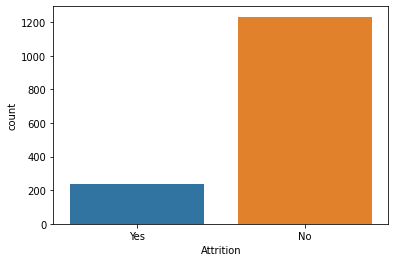

In [51]:
sns.countplot(df['Attrition'])

- The Target variable class is not balanced.
- The target variable will be treated for class imbalance later
- Attrition level No is High as compared to Attrition level Yes.

# Missing Value

In [52]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

-  There are no missing value in the dataset.

# Boxplot for Outlier Detection

<AxesSubplot:>

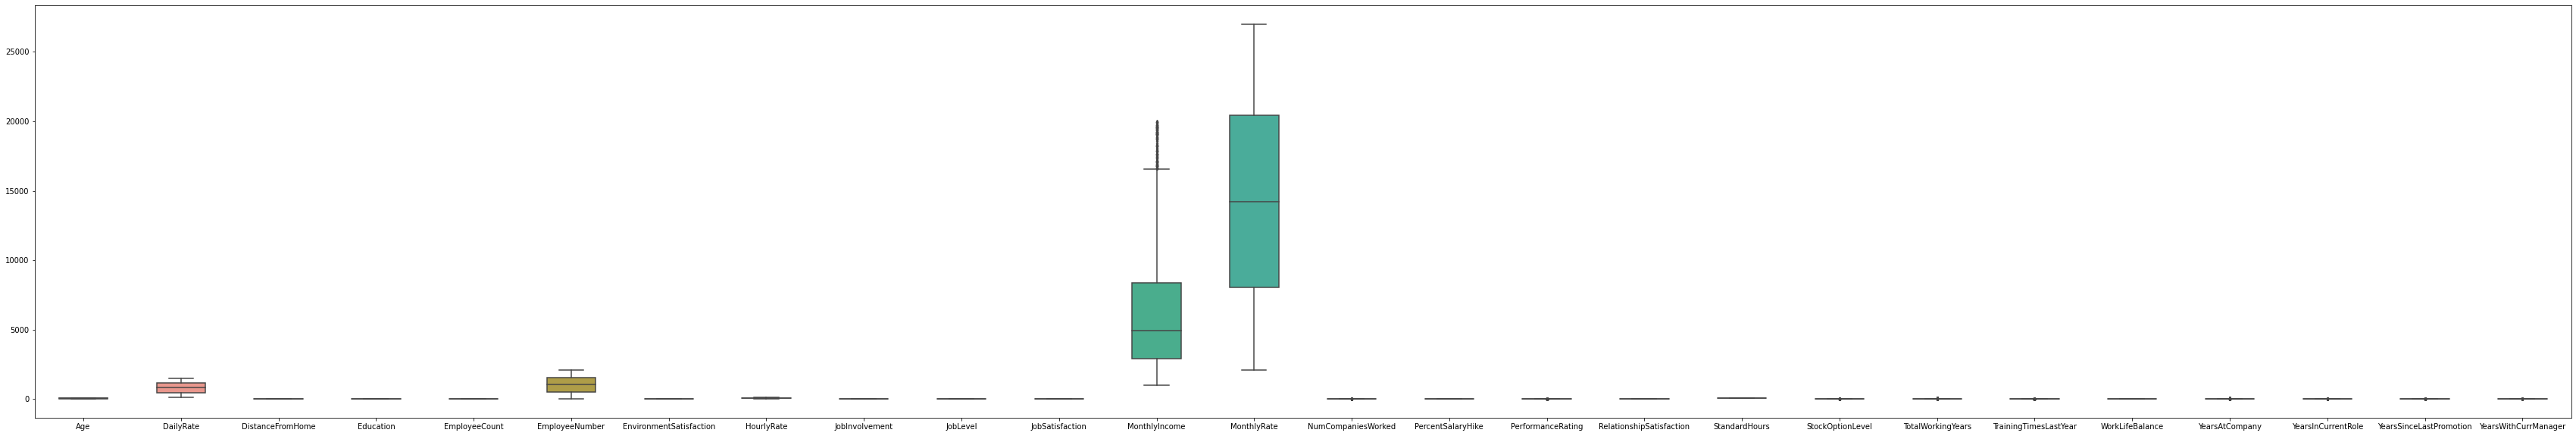

In [53]:
fig, ax =plt.subplots(figsize=(60,10))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=3)

- No outliers seen in the dataset.

# Skewness Detection

In [54]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

- There are continous variable which are right skewed.
- These (DistanceFromHome,TotalWorkingYears,PercentSalaryHike,MonthlyIncome,YearsAtCompany)variables shows some positive skewness and slightly right skewed.
- TrainingTimeLastYear is slighly left skewed.

# Histogram plot

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'cen

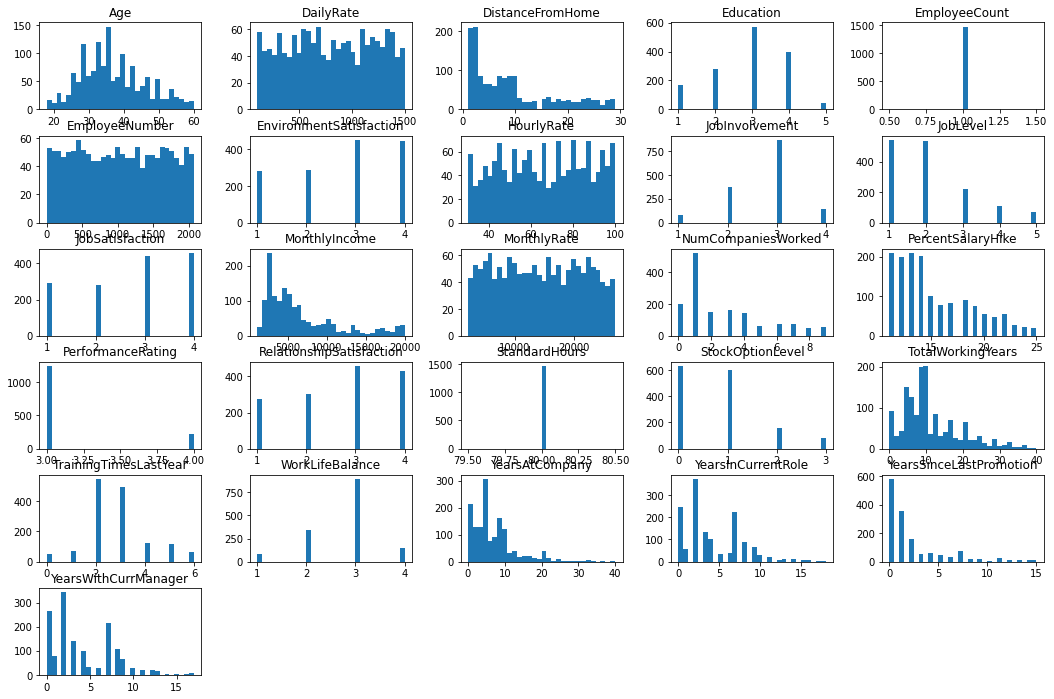

In [55]:
df.hist(grid=False, figsize=(18,12), bins=30)

- There are continous variable which are right skewed.
- These (DistanceFromHome,TotalWorkingYears,PercentSalaryHike,MonthlyIncome,YearsAtCompany)variables shows some positive skewness and slightly right skewed.
- TrainingTimeLastYear is slighly left skewed.

# Dividing dataset into numeric & object data type

In [56]:
numerics_var = ['float64', 'int64']
numeric_df = df.select_dtypes(include=numerics_var)
objects_df = df.select_dtypes(exclude=numerics_var)

- Numeric & Object Data type is separated for better EDA.

In [57]:
numeric_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


- There are 26 rows which are numeric data type

In [58]:
objects_df.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


- There are 9 col which are object data types 

In [59]:
objects_df.describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


- Count reflects no of rows which is 1470 in all object col.
- Attrition has 2 binary class yes & no, where count of 'No' is 1233.
- Education filed has 6 class with freq = 606 and the highest class is life Science.
- Gender has male count high with freq = 882.
- Similar obs can be seen for remaining variable.

In [60]:
objects_df.dtypes

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

- shows 9 object data type

In [61]:
numeric_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


- High difference seen between max & 75 percentile for most of the variables.
- std seen high for Dailyrate, EmployeeNumber.
- Mean is greatert then 50% percentile in DistanceFromHome,TotalWorkingYears,YearsAtCompany.
- As per obs data is skewed & not normal distributed for these variables.
- Similar obs can be drawn for other variables.

In [62]:
numeric_df.dtypes

Age                         int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

- all col seen as int data types in numeric dataframe.

In [63]:
objects_df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

# Countplot for Object/Category Variable.

- Shows variable name without space and special character.

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

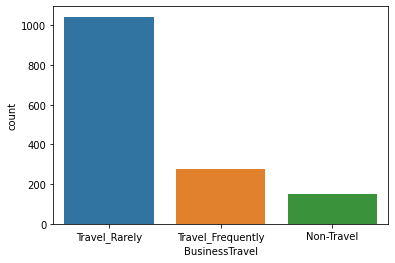

In [64]:
sns.countplot(df['BusinessTravel'])

- Business travel has has three class where count/freq of  travel_Rarely class is highest

<AxesSubplot:xlabel='Department', ylabel='count'>

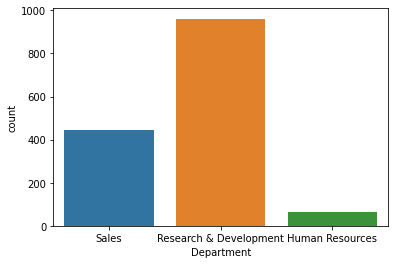

In [65]:
sns.countplot(df['Department'])

- Department also has three class where freq of R&D class is highest.

<AxesSubplot:xlabel='EducationField', ylabel='count'>

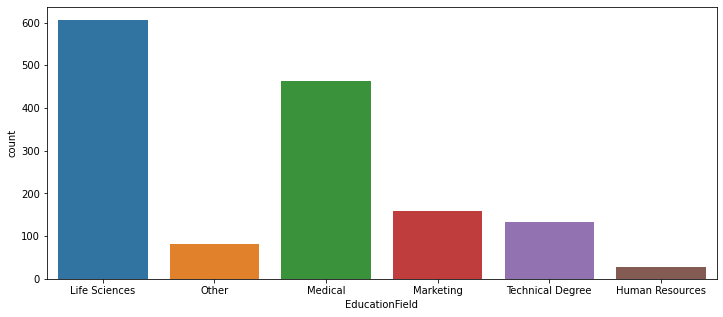

In [66]:
fig, ax =plt.subplots(figsize=(12,5))
sns.countplot(df['EducationField'])

- EducationField has 6 class.
- Where freq of HR Class is least.
- Lifescience freq is the highest among rest others.

<AxesSubplot:xlabel='Gender', ylabel='count'>

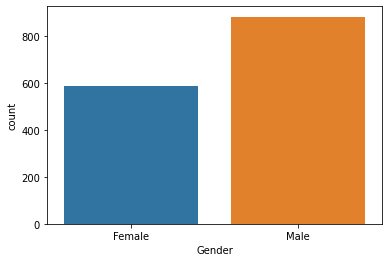

In [67]:
sns.countplot(df['Gender'])

- Male freq is higher then female
- has only 2 class male & female.

<AxesSubplot:xlabel='JobRole', ylabel='count'>

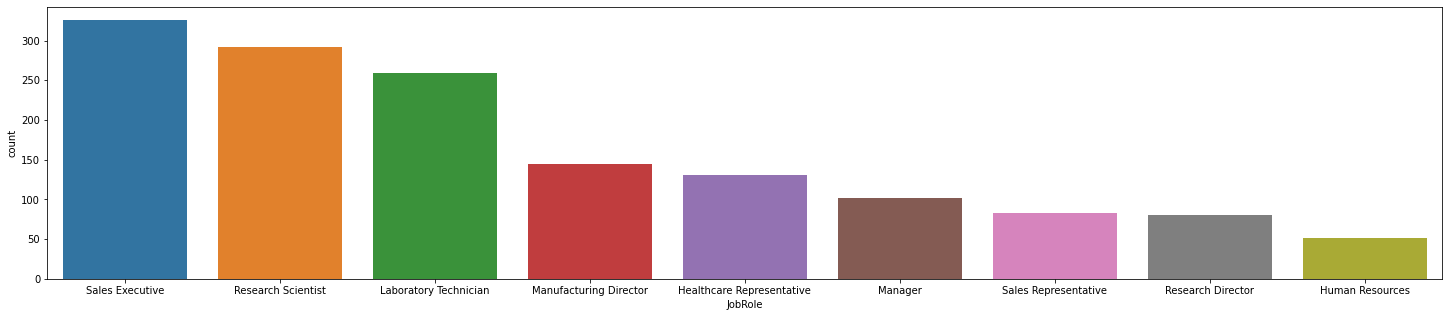

In [68]:
fig, ax =plt.subplots(figsize=(25,5))
sns.countplot(df['JobRole'])

- Jobrole has 9 class.
- Highest freq is the Sales Executive.
- Human resource freq is the least one.

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

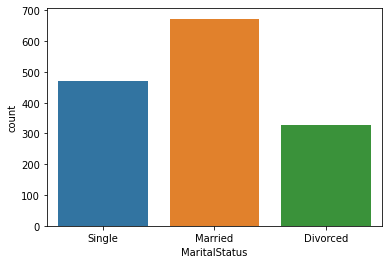

In [69]:
sns.countplot(df['MaritalStatus'])

- Marital status has 3 class.
- Married class freq is the highest.
- single class is the second highest.
- divorced class is the third highest.

<AxesSubplot:xlabel='Over18', ylabel='count'>

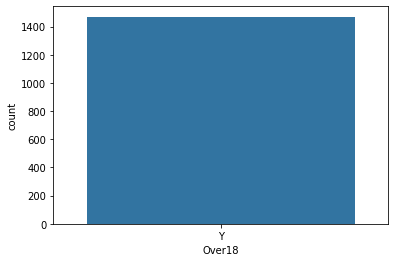

In [70]:
sns.countplot(df['Over18'])

- this variable has only one class and same unique value.
- this variable can be dropped as the value is same in all rows and not much influencing the target col.

<AxesSubplot:xlabel='OverTime', ylabel='count'>

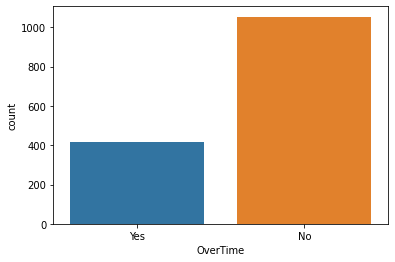

In [71]:
sns.countplot(df['OverTime'])

- Overtime col has 2 class.
- No class freq is the highest.

# Skewness detection in numeric col

In [72]:
numeric_df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

- There are continous variable which are right skewed.
- These (DistanceFromHome,TotalWorkingYears,PercentSalaryHike,MonthlyIncome,YearsAtCompany)variables shows some positive skewness and slightly right skewed.
- TrainingTimeLastYear is slighly left skewed.

# Disstplot

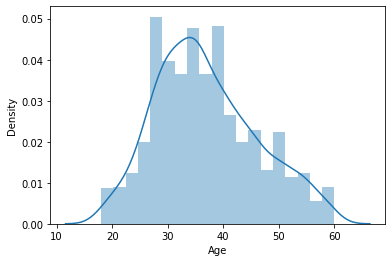

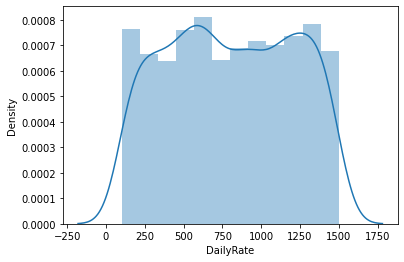

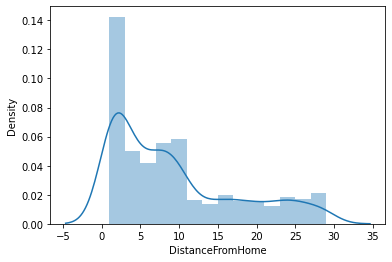

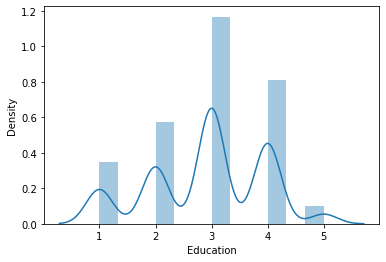

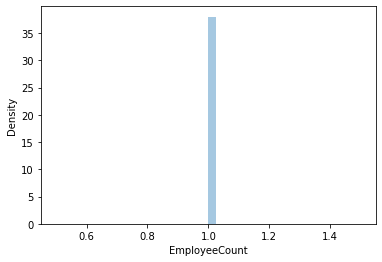

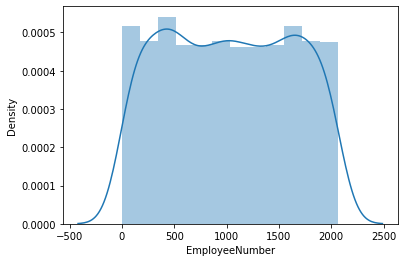

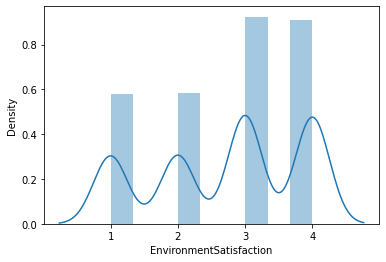

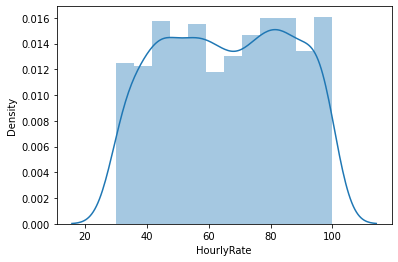

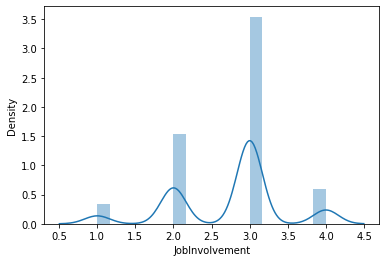

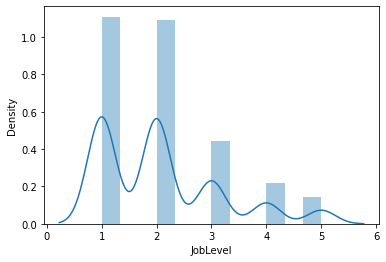

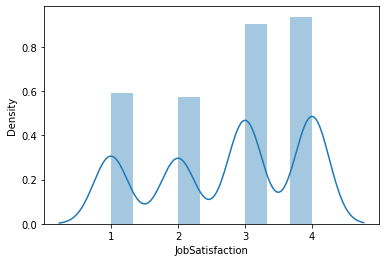

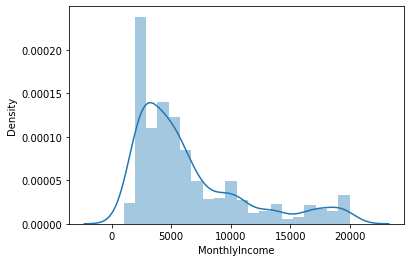

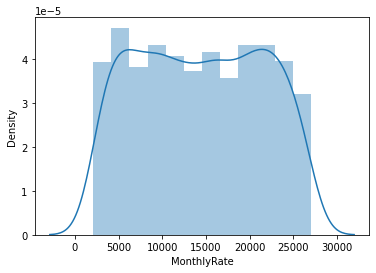

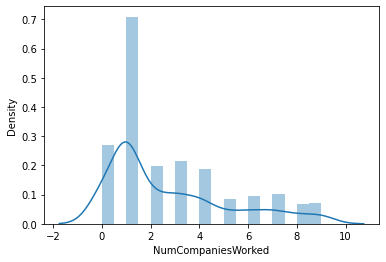

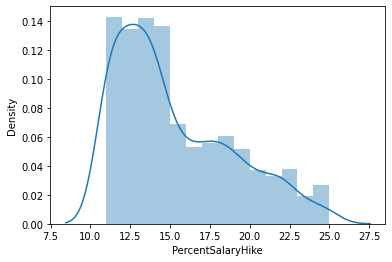

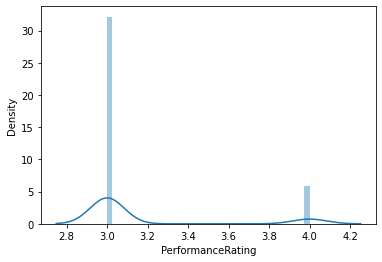

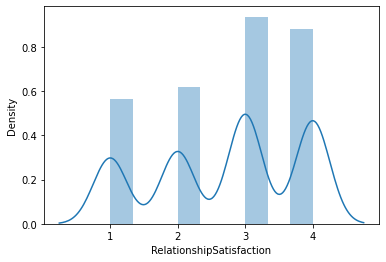

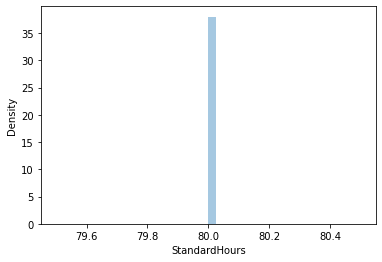

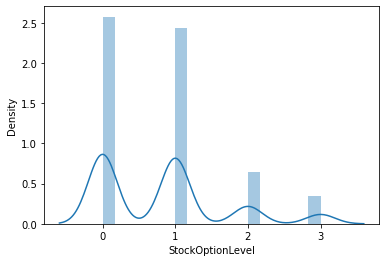

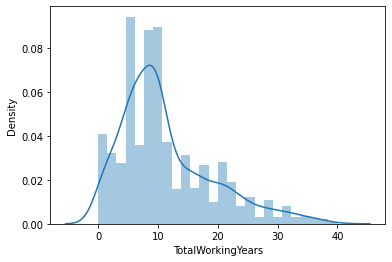

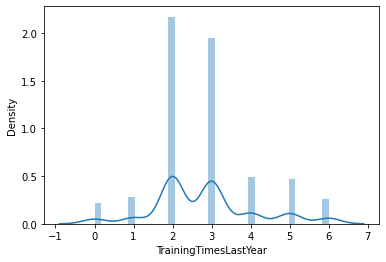

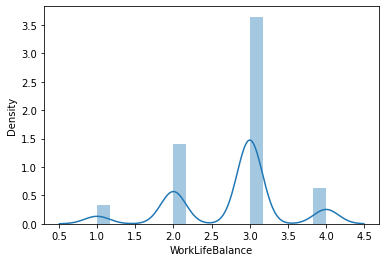

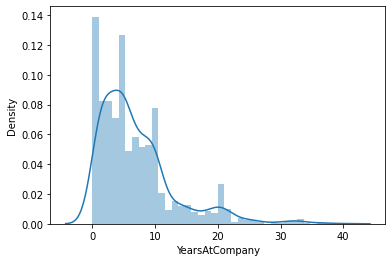

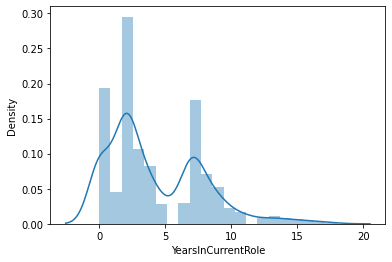

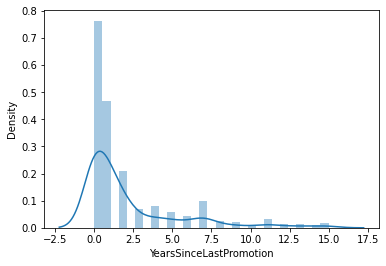

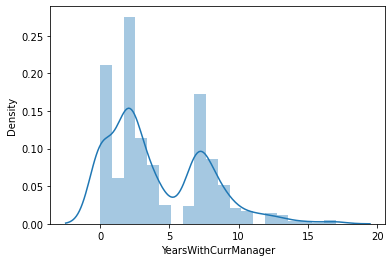

In [73]:
for i in numeric_df:
    plt.figure()
    sns.distplot(numeric_df[i])

- There are continous variable which are right skewed.
- These (DistanceFromHome,TotalWorkingYears,PercentSalaryHike,MonthlyIncome,YearsAtCompany)variables shows some positive skewness and slightly right skewed.
- TrainingTimeLastYear is slighly left skewed.

# Labelencoding Object & Categorical data type.

In [74]:
# categorical variable encoding
cat_vars_list = objects_df.columns.tolist()
## Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in cat_vars_list :
    df[i] = le.fit_transform(df[i])

- all 9 cat variable is label encoded for further analysis and to make model.

In [75]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


- we can see all the 9 object col is label encoded

In [76]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

- shows all col name without any special character and any spaces for df dataframe.

In [77]:
df.drop(['EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)

- These 3 variable are dropped (EmployeeCount,Over18,StandardHours) as there is only one value in all rows.
- These 3 variable is not much influencing the target col, hence dropped.

# Correlation

In [78]:
corr = df.corr()
corr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,-0.010145,0.010146,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.010577,-0.103369,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,-0.015578,0.004174,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,-0.050990,0.018355,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.010895,-0.019395,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,0.032916,-0.016075,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,0.042070,-0.027128,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,-0.002516,0.043163,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,1.000000,0.017621,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,0.017621,1.000000,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


- Target col Attrition shows negative corr with almost all variables.
- Job level & Monthlyincome shows positive corr with (yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmamager & Totalworkingyears).
- Job level  shows high positive corr with Monthlyh income.
- Age show positive corr with totalworkingyears and joblevel.
- (yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmamager) are highly correlated with each others.

# Heatmap

<AxesSubplot:>

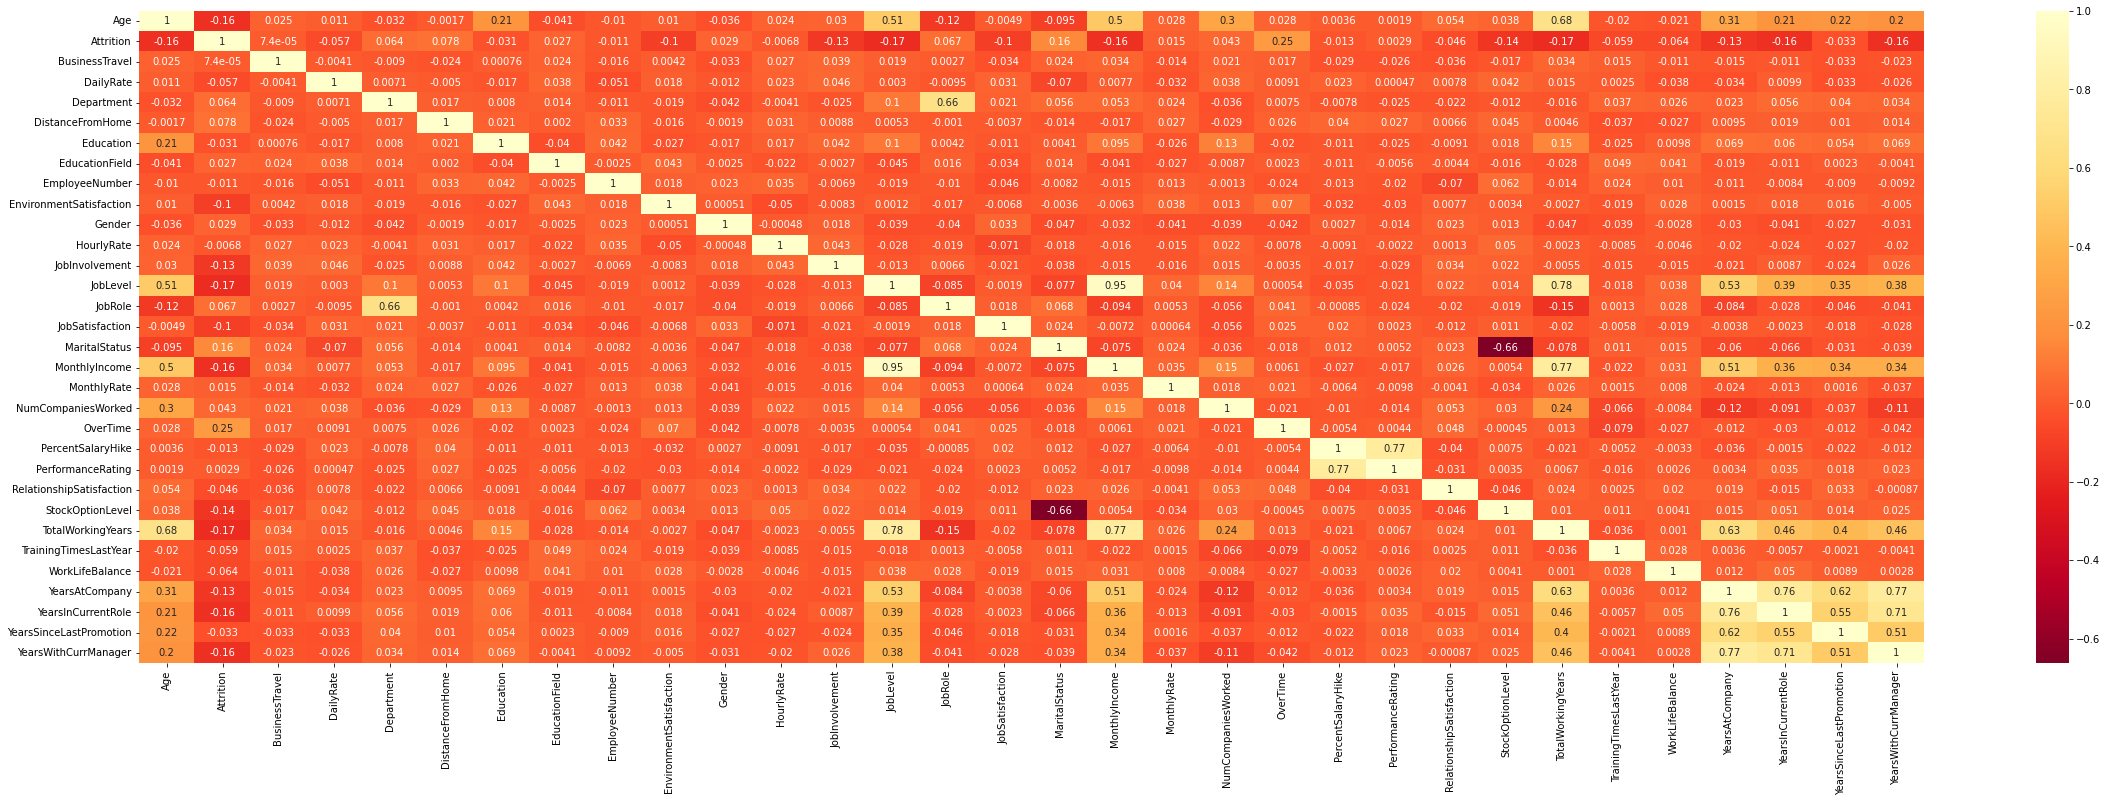

In [79]:
plt.figure(figsize=(40,12))
sns.heatmap(corr,cmap='YlOrRd_r', annot=True)

- Target col Attrition shows negative corr with almost all variables.
- Job level & Monthlyincome shows positive corr with (yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmamager & Totalworkingyears).
- Job level  shows high positive corr with Monthlyh income.
- Age show positive corr with totalworkingyears and joblevel.
- (yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmamager) are highly correlated with each others.

# VIF for multicollinearity test

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

- Importing VIF from stats module.

In [81]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["features"]=df.columns
    print(vif)

- Computing VIF

In [82]:
vif_calc()

    VIF Factor                  features
0    33.382861                       Age
1     1.487239                 Attrition
2     6.749054            BusinessTravel
3     4.980538                 DailyRate
4    13.045125                Department
5     2.340882          DistanceFromHome
6     9.491468                 Education
7     3.872875            EducationField
8     3.927949            EmployeeNumber
9     7.212119   EnvironmentSatisfaction
10    2.523201                    Gender
11   11.280942                HourlyRate
12   15.246614            JobInvolvement
13   52.590753                  JobLevel
14    8.079371                   JobRole
15    7.100546           JobSatisfaction
16    5.891988             MaritalStatus
17   32.087861             MonthlyIncome
18    5.021723               MonthlyRate
19    2.762730        NumCompaniesWorked
20    1.552753                  OverTime
21   42.552534         PercentSalaryHike
22  125.350132         PerformanceRating
23    7.305887  

- PerformanceRating has vif in the VIF table.
- JobLevel,PercentSalaryHike, MonthlyIncome shows some multicollinearity.
- None of variable will be dropped as the dimmesion of the dataframe will be reduced with the help of PCA.

# Removing Skewness

In [83]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
W

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.079069
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
W

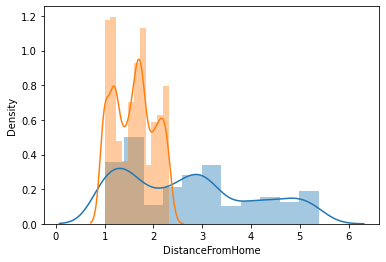

In [85]:
import numpy as np
sns.distplot(df['DistanceFromHome'])
df['DistanceFromHome']=np.sqrt(df['DistanceFromHome'])
sns.distplot(df['DistanceFromHome'])
df.skew()

- Orange graph shows right skeweness which got reduced with sqrt method

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.176358
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           0.176358
TrainingTimesLastYear       0.553124
W

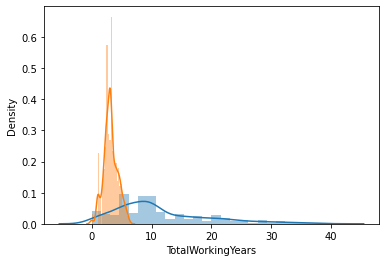

In [87]:
import numpy as np
sns.distplot(df['TotalWorkingYears'])
df['TotalWorkingYears']=np.sqrt(df['TotalWorkingYears'])
sns.distplot(df['TotalWorkingYears'])
df.skew()

- Orange graph shows right skeweness which got reduced with sqrt method

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.176358
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.655412
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           0.176358
TrainingTimesLastYear       0.553124
W

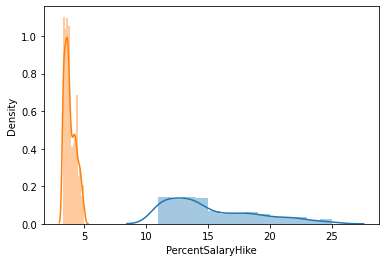

In [88]:
import numpy as np
sns.distplot(df['PercentSalaryHike'])
df['PercentSalaryHike']=np.sqrt(df['PercentSalaryHike'])
sns.distplot(df['PercentSalaryHike'])
df.skew()

- Orange graph shows right skeweness which got reduced with sqrt method

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.176358
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.861960
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.655412
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           0.176358
TrainingTimesLastYear       0.553124
W

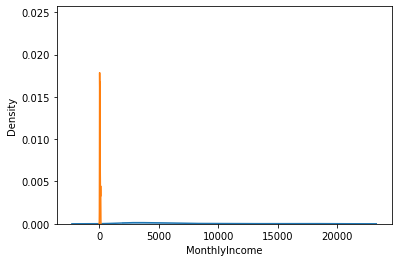

In [89]:
import numpy as np
sns.distplot(df['MonthlyIncome'])
df['MonthlyIncome']=np.sqrt(df['MonthlyIncome'])
sns.distplot(df['MonthlyIncome'])
df.skew()

- Orange graph shows right skeweness which got reduced with sqrt method

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.176358
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.861960
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.655412
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           0.176358
TrainingTimesLastYear       0.553124
W

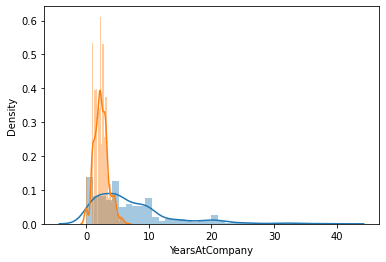

In [90]:
import numpy as np
sns.distplot(df['YearsAtCompany'])
df['YearsAtCompany']=np.sqrt(df['YearsAtCompany'])
sns.distplot(df['YearsAtCompany'])
df.skew()

- Orange graph shows right skeweness which got reduced with sqrt method

# Dividing Dataset into Independent x & Dependent y

In [118]:
x=df.drop("Attrition",axis=1)
y=df["Attrition"]

- Dataframe is divided into independent variables(x) & dependent variable(y)

In [119]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,2.828427,2,1,1,2,0,...,3,1,0,2.828427,0,1,2.449490,4,0,5
1,49,1,279,1,3.162278,1,1,2,3,1,...,4,4,1,3.162278,3,3,3.162278,7,1,7
2,37,2,1373,1,2.645751,2,4,4,4,1,...,3,2,0,2.645751,3,3,0.000000,0,0,0
3,33,1,1392,1,2.828427,4,1,5,4,0,...,3,3,0,2.828427,3,3,2.828427,7,3,0
4,27,2,591,1,2.449490,1,3,7,1,1,...,3,4,1,2.449490,3,3,1.414214,2,2,2


- Independent variables(x) without target col.

In [120]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

- y represent Target col-attrition. 

# Treating Class Imbalance

In [121]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

- 0 represnts Attrition No
- 1 represents Attrition Yes

- we will be performing upsampling where class of 1(yes) will be balanced with class of 0(No)

In [122]:
from sklearn.utils import resample

-importing resample library from utils module to balance the class of target col.

In [123]:
# Concatenate our training data back together
x = pd.concat([x, y], axis=1)

- combining both independent and target col.

In [124]:
Ano = x[x.Attrition==0]
Ays = x[x.Attrition==1]

In [ ]:
- Ano instance for class 0-No
- Ays instance for class 1-Yes

In [125]:
# upsample minority
dia_upsampled = resample(Ays,
                          replace=True, # sample with replacement
                          n_samples=len(Ano),   # match number in majority
                          random_state=27)  # reproducible results

-Computing upsampling

In [126]:
upsampled = pd.concat([Ano, dia_upsampled])

- Combining both the class after upsampling

In [127]:
upsampled.Attrition.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

- Both the class of target col is balanced.
- Class of 1(yes) is upsampled with class of 0(no)
- both class is balanced with value = 1233

In [128]:
upsampled.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1,49,1,279,1,3.162278,1,1,2,3,1,...,4,1,3.162278,3,3,3.162278,7,1,7,0
3,33,1,1392,1,2.828427,4,1,5,4,0,...,3,0,2.828427,3,3,2.828427,7,3,0,0
4,27,2,591,1,2.449490,1,3,7,1,1,...,4,1,2.449490,3,3,1.414214,2,2,2,0
5,32,1,1005,1,2.828427,2,1,8,4,1,...,3,0,2.828427,2,2,2.645751,7,3,6,0
6,59,2,1324,1,3.464102,3,3,10,3,0,...,1,3,3.464102,3,2,1.000000,0,0,0,0


- upsampled is new dataframe after balancing the class.

In [129]:
x=upsampled.drop("Attrition",axis=1)
y=upsampled["Attrition"]

- dividing the independent variable & target variable from upsampled dataframe.

In [130]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,1,279,1,3.162278,1,1,2,3,1,...,4,4,1,3.162278,3,3,3.162278,7,1,7
3,33,1,1392,1,2.828427,4,1,5,4,0,...,3,3,0,2.828427,3,3,2.828427,7,3,0
4,27,2,591,1,2.449490,1,3,7,1,1,...,3,4,1,2.449490,3,3,1.414214,2,2,2
5,32,1,1005,1,2.828427,2,1,8,4,1,...,3,3,0,2.828427,2,2,2.645751,7,3,6
6,59,2,1324,1,3.464102,3,3,10,3,0,...,4,1,3,3.464102,3,2,1.000000,0,0,0


- Target col is absent in independent variable (x) 

In [131]:
y.head()

1    0
3    0
4    0
5    0
6    0
Name: Attrition, dtype: int32

- Target variable as y after upsampling

In [132]:
y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

- Target col after upsampling showing both the class is balanced.

# Scaling

In [134]:
from sklearn.preprocessing import StandardScaler

- Importing standard scaler library.

In [135]:
scaling = StandardScaler()
x=scaling.fit_transform(x)
x

array([[ 1.35506707, -0.98455558, -1.2366727 , ...,  0.93544334,
        -0.33121341,  0.96867805],
       [-0.29078567, -0.98455558,  1.55090027, ...,  0.93544334,
         0.31090316, -1.03219792],
       [-0.90798045,  0.60543398, -0.45525063, ..., -0.47838558,
        -0.01015513, -0.46051907],
       ...,
       [-1.42230943, -0.98455558,  1.49079088, ..., -0.47838558,
        -0.33121341, -0.46051907],
       [ 1.04646968,  0.60543398, -0.25989511, ...,  1.21820912,
         0.63196144,  0.96867805],
       [ 0.84073809,  0.60543398,  0.81205568, ...,  0.08714598,
        -0.6522717 , -0.46051907]])

- The dataset is scaled so that all the values in dataset will have similar range of values.

# Dimension Reduction Technique: Principal Component Analysis.

In [137]:
from sklearn.decomposition import PCA

- Importing PCA from decomposition module.
- As this dataset has high input variables, So I am using PCA technique to reduce the dimension of the dataframe.

In [138]:
pca = PCA(n_components=10)
x = pca.fit_transform(x)

- We are setting the PCA = 10 variable or col
- Appying the PCA to independent variables(x).

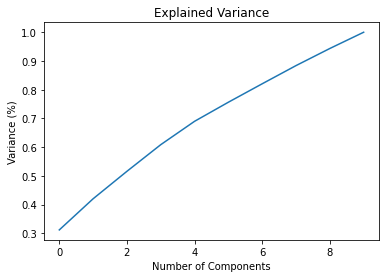

In [139]:
import matplotlib.pyplot as plt
import seaborn as sna
pca = PCA()
principalComponents = pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

- As per above diagram there are only 8 component which are significant and can explain the percentage of variance.

In [140]:
pca = PCA(n_components=8)
new_data = pca.fit_transform(x)
principal_x = pd.DataFrame(new_data,columns = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8'])


- Principal_x is the new dataframe with 8 component representing as 8 independent variable.

In [141]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
0,0.997843,-0.402401,2.969433,-0.528298,0.329051,0.546881,-2.016266,0.664621
1,-0.406557,-0.692560,-0.857927,-0.240468,-0.305087,1.012492,-0.294016,-0.410192
2,-1.414337,1.631874,-0.941227,-0.010311,-0.893103,0.395977,-0.446193,1.147816
3,-0.135850,-0.469496,-0.449952,-1.743654,-1.973934,1.748796,0.302157,-0.338064
4,-0.571473,2.915002,2.945395,1.006773,1.350808,0.072141,2.026868,0.452655
...,...,...,...,...,...,...,...,...
2461,4.702197,0.652635,-0.005076,1.127629,-1.259674,0.449852,-0.503242,-1.234397
2462,-3.047528,0.459149,2.977560,0.653521,-1.196280,1.372562,-0.930677,-1.912822
2463,-2.218605,0.257373,0.025030,-0.578487,-1.852596,0.629912,2.253113,1.610296
2464,1.861986,-2.269730,-0.449125,0.236003,-0.595812,1.521627,-0.121474,1.276272


In [ ]:
- principal_x shows scaled value which we will be using as the new independent variable(x)

In [142]:
x = c

- remapping x = principal_x

In [143]:
x.shape

(2466, 8)

- after PCA we can see x has 2466 rows and 8 PCA component as independent variables.

In [144]:
y.shape

(2466,)

- Target col also has 2466 rows 

In [145]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm = DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100, "at random_state", i)  

90.17199017199017 at random_state 0
90.54054054054053 at random_state 1
88.6977886977887 at random_state 2
90.66339066339066 at random_state 3
91.4004914004914 at random_state 4
90.7862407862408 at random_state 5
89.55773955773955 at random_state 6
91.15479115479116 at random_state 7
90.2948402948403 at random_state 8
88.82063882063882 at random_state 9
86.60933660933661 at random_state 10
89.55773955773955 at random_state 11
90.04914004914005 at random_state 12
88.82063882063882 at random_state 13
87.83783783783784 at random_state 14
90.2948402948403 at random_state 15
88.20638820638821 at random_state 16
88.57493857493857 at random_state 17
91.8918918918919 at random_state 18
87.83783783783784 at random_state 19
90.54054054054053 at random_state 20
90.54054054054053 at random_state 21
90.17199017199017 at random_state 22
89.06633906633907 at random_state 23
89.68058968058969 at random_state 24
89.1891891891892 at random_state 25
88.57493857493857 at random_state 26
89.55773955773955 

- Decsiontree classifier is set for 200 random state in order to check the accu for each state & to select the best random state

In [146]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9324324324324325  on Random_state  86


-Obs : Above code is used to select best random sate out of 200 random state which is 86 with accuracy of 93%

# Splitting dataset in train & test

In [147]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 86)

- 70% data used to train the model
- 30% data used to test & predict the model on test data.
- Best random state used is 86

# Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)


# Obs : Logistic Regression is giving 76% Accuracy

[0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1
 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0
 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0
 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1
 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1
 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1
 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1
 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0
 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0
 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1
 1 0 1 1 0 0 0 1 1 0 0 1 

- Log Regression Acc = 66%

# Decison tree Classifier

In [150]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred = DTC.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

# Obs Decision Tree Classifier is giving 80% Accuracy on y test data

0.9283783783783783
              precision    recall  f1-score   support

           0       0.99      0.87      0.92       375
           1       0.88      0.99      0.93       365

    accuracy                           0.93       740
   macro avg       0.93      0.93      0.93       740
weighted avg       0.94      0.93      0.93       740



In [ ]:
- DTC Acc = 91%

# Random Forest Classifier

In [151]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

# Obs : Random forest classifier is  giving 83% acc on y test data

0.9702702702702702
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       375
           1       0.95      0.99      0.97       365

    accuracy                           0.97       740
   macro avg       0.97      0.97      0.97       740
weighted avg       0.97      0.97      0.97       740



In [ ]:
-RFR    Acc = 90%

# Support Vector Classifier

In [152]:
SV = SVC()
SV.fit(x_train, y_train)
pred = SV.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)


0.7608108108108108
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       375
           1       0.78      0.72      0.75       365

    accuracy                           0.76       740
   macro avg       0.76      0.76      0.76       740
weighted avg       0.76      0.76      0.76       740



- SVC Acc = 76%

# KNN Classifier

In [153]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

# Obs KNN is giving 78% accuracy on y test data

0.7918918918918919
              precision    recall  f1-score   support

           0       0.86      0.71      0.77       375
           1       0.74      0.88      0.81       365

    accuracy                           0.79       740
   macro avg       0.80      0.79      0.79       740
weighted avg       0.80      0.79      0.79       740



- Knn Acc = 79%

# K-Fold Cross validation

In [154]:
from sklearn.model_selection import cross_val_score  # Importing cross val score
from sklearn.model_selection import KFold  # Imporing Kfold CV

In [155]:
cross_validation=KFold(5, shuffle =True) 
# Creating CV Object with shuffle = true to avoid -ve CV Values as o/p

In [156]:
print(cross_val_score(lg,x,y,cv=cross_validation).mean()) # Logistic regression CV o/p

0.6638353959481321


In [157]:
print(cross_val_score(DTC,x,y,cv=cross_validation).mean()) # Decision Tree Classifier CV o/p

0.9018641548480344


In [158]:
print(cross_val_score(RFC,x,y,cv=cross_validation).mean()) # Random Forest Classifier CV o/p

0.9695814274334612


In [159]:
print(cross_val_score(SV,x,y,cv=cross_validation).mean()) # Support vector Classifier  CV o/p

0.7656174294372222


In [160]:
print(cross_val_score(knn,x,y,cv=cross_validation).mean()) # knn classifier  CV o/p

0.8073794253147302


# GridSearch CV & Hyperparameter Tuning

In [161]:
from sklearn.model_selection import GridSearchCV # Importing Gridsearch CV from sklearn

In [162]:
import numpy as np
parameter = {'max_depth' : np.arange(2,10),
            'criterion':['gini','entropy'],
            'n_estimators' : [100],
            'max_features' : ['auto','sqrt','log2']}

- Hyperparameter is set with multiple values to select the best one through GridsearchCV

In [163]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=cross_validation)

-Obs : Applying Gridsearch to best model random forest classifier 

In [164]:
GCV.fit(x_train,y_train)
# Grid search CV applied to the Training Dataset 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100]})

- Grid search CV applied to the Training Dataset 

In [165]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'n_estimators': 100}

- Best Parameter is selected from grid search CV which is 
- 'criterion': 'gini','max_depth': 9,'max_features': 'sqrt','n_estimators': '100'

# Best Model Selected is Random Forest Classifier

In [166]:
Final_mod = RandomForestClassifier(criterion = 'gini', max_depth = 9,max_features='sqrt',n_estimators= 100)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

91.48648648648648


-Obs :  Final Accuracy of the best model = 91.48

# AUC-ROC Curve & AUC Score

In [167]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

-Obs : Importing roc_curve & ruc_auc_score metrics from sklearn.

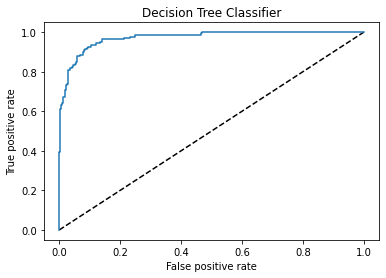

0.9148675799086757

In [168]:
y_pred_prob= Final_mod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,Final_mod.predict(x_test))
auc_score

ObS : ROC Curve : Classifiers that give curves closer to top left corner indicates that model will give better performance & if the
curve comming closer to 45 degree diagonal of the ROC space the less accurate the model will be, so in above case the curve is 
closer to top left corner hence I believe the model will give better performance.

# Exporting Model with joblib library

In [169]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']

-Obs :  Exporting ML Model as .pkl file with joblib library